In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder

import plotly.express as px
from plotly import subplots
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

In [3]:

df=pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Descriptive Data

In [4]:
df.shape

(200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
# checking if the data contains any NULL values

df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

# Visualization 

In [8]:
#visualizing classes
total = len(df)
drugs = df["Drug"].value_counts()
drugs = drugs.sort_index(ascending = False)
percentage = [
              str(round(value/total*100, 2)) + "%" \
              for value in drugs.values
]
trace0 = go.Bar(
    x = drugs.values,
    y = drugs.keys(),
    orientation = 'h',
    texttemplate = percentage,
    textposition = "outside",
    textfont_color = "white",
    marker = dict(
        color = drugs.values,
        colorscale = "OrRd"
    )
)
data = [trace0]
fig = go.Figure(data)
fig.update_layout(
    title = "Classified Drugs",
    xaxis_title = "Count",
    yaxis_title = "Drugs",
    template = "plotly_dark",
)
fig.show()

In [9]:
# Create the pie charts
cholesterol_pie = go.Pie(
    labels=df["Cholesterol"].unique(),
    values=df["Cholesterol"].value_counts(),
    textinfo="label+percent",
    insidetextorientation="radial",
)
bp_pie = go.Pie(
    labels=df["BP"].unique(),
    values=df["BP"].value_counts(),
    textinfo="label+percent",
    insidetextorientation="radial",
)
sex_pie = go.Pie(
    labels=df["Sex"].unique(),
    values=df["Sex"].value_counts(),
    textinfo="label+percent",
    insidetextorientation="radial",
)

# Create a figure object
fig = go.Figure(data=[cholesterol_pie, bp_pie, sex_pie])

# Show the figure
fig.show()

In [10]:
# Create a pie chart for cholesterol
cholesterol_pie = go.Pie(
    labels=df["Cholesterol"].unique(),
    values=df["Cholesterol"].value_counts(),
    hole=0.4,
    title="Cholesterol",
)


# Create a figure and add the three pie charts
fig = go.Figure(data=[cholesterol_pie])

# Show the figure
fig.show()

In [11]:
# Create a pie chart for cholesterol
BP_pie = go.Pie(
    labels=df["BP"].unique(),
    values=df["BP"].value_counts(),
    hole=0.4,
    title="Blood Pressure",
)


# Create a figure and add the three pie charts
fig = go.Figure(data=[BP_pie])

# Show the figure
fig.show()

In [12]:

# Set the template to dwhite
template = "plotly_white"

# Set the colors of the boxplots
colors = {
    "box": "#ffffff",
    "box_color": "#d68484",
    
}

# Create the boxplots
trace0 = go.Box(
    y = df["Age"],
    boxmean = True,
    boxpoints = "all",
    jitter = 0.3,
    pointpos = -2,
    name = "Age",
    marker = dict(color=colors["box_color"]),
)
trace1 = go.Box(
    y = df["Na_to_K"],
    boxmean = True,
    boxpoints = "all",
    jitter = 0.3,
    pointpos = -2,
    name = "Sodium to Potassium Ratio",
    marker = dict(color=colors["box_color"]),
)

# Create the figure
fig = subplots.make_subplots(
    rows = 1, cols = 2,
    horizontal_spacing = 0.2
)
fig.add_trace(trace0, row = 1, col = 1)
fig.add_trace(trace1, row = 1, col = 2)

# Update the y-axes titles
fig.update_yaxes(title_text="Years", row=1, col=1)
fig.update_yaxes(title_text="Ratio", row=1, col=2)

# Update the layout
fig.update_layout(
    title="Age and Na_P",
    template=template,
    showlegend=False,
    height=700,
)

# Show the figure
fig.show()

In [13]:
# Set the template to white
template = "plotly_white"

# Set the colors of the boxplots
colors = {
    "box": "#FFFFFF",
    "box_color": "#d68484",
}

# Create the traces
trace0 = go.Box(
    y = df["Age"],
    x = df["Cholesterol"],
    boxmean = True,
    boxpoints = "all",
    jitter = 0.4,
    pointpos = -2,
    name = "Cholesterol",
    marker = dict(color=colors["box_color"]),
)
trace1 = go.Box(
    y = df["Age"],
    x = df["BP"],
    boxmean = True,
    boxpoints = "all",
    jitter = 0.3,
    pointpos = -2,
    name = "Blood pressure",
    marker = dict(color=colors["box_color"]),
)


# Create the figure
fig = subplots.make_subplots(
    rows = 1, cols = 3,
    horizontal_spacing = 0.2
)
fig.add_trace(trace0, row = 1, col = 1)
fig.add_trace(trace1, row = 1, col = 2)

# Update the y-axes titles
fig.update_yaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Age", row=1, col=2)

# Update the x-axes titles
fig.update_xaxes(title_text="Cholesterol", row=1, col=1)
fig.update_xaxes(title_text="Blood pressure", row=1, col=2)

# Update the layout
fig.update_layout(
    title="Blood pressure and Cholesterol vs Age",
    template=template,
    showlegend=False,
    height=700,
)

# Show the figure
fig.show()

**The correlation of Age and Drug**

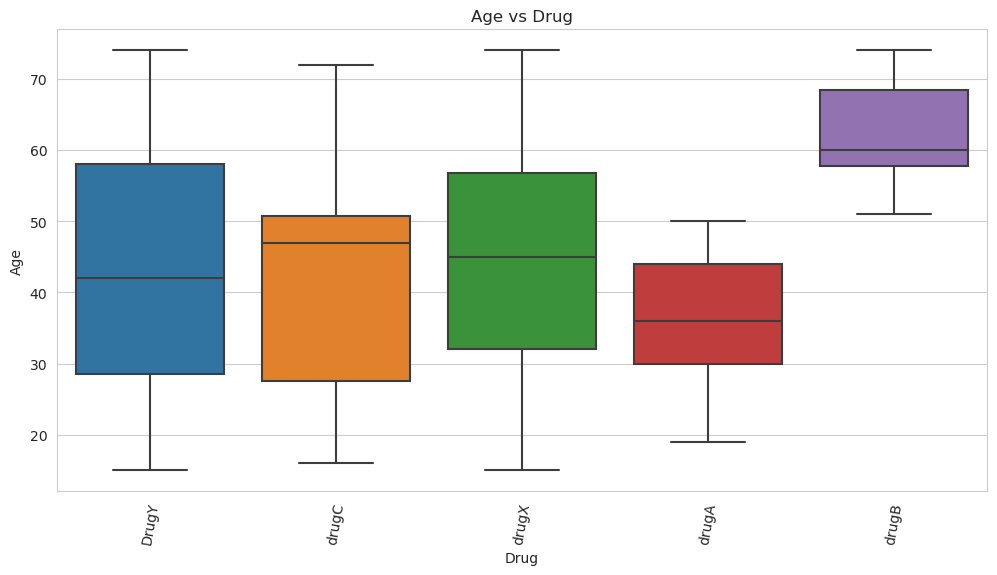

In [14]:
# Set the style
sns.set_style("whitegrid")

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=df, x="Drug", y="Age",  ax=ax)

# Make the x-ticks smoother
plt.xticks(rotation=80)

# Add labels to the axes
plt.xlabel("Drug")
plt.ylabel("Age")
plt.title("Age vs Drug")

# Show the figure
plt.show()

# Data Normalization 

In [15]:
# Create a label encoder object
le = LabelEncoder()

le = LabelEncoder()

# Convert the object columns to label encoded columns
for col in ["Cholesterol", "BP", "Sex","Drug"]:
    df[col] = le.fit_transform(df[col])
    
    
dataframe_encoded = df[["Age", "Na_to_K", "Drug", "Cholesterol", "BP", "Sex"]]

print(dataframe_encoded)

     Age  Na_to_K  Drug  Cholesterol  BP  Sex
0     23   25.355     0            0   0    0
1     47   13.093     3            0   1    1
2     47   10.114     3            0   1    1
3     28    7.798     4            0   2    0
4     61   18.043     0            0   1    0
..   ...      ...   ...          ...  ..  ...
195   56   11.567     3            0   1    0
196   16   12.006     3            0   1    1
197   52    9.894     4            0   2    1
198   23   14.020     4            1   2    1
199   40   11.349     4            1   1    0

[200 rows x 6 columns]


# Correlation

<Axes: >

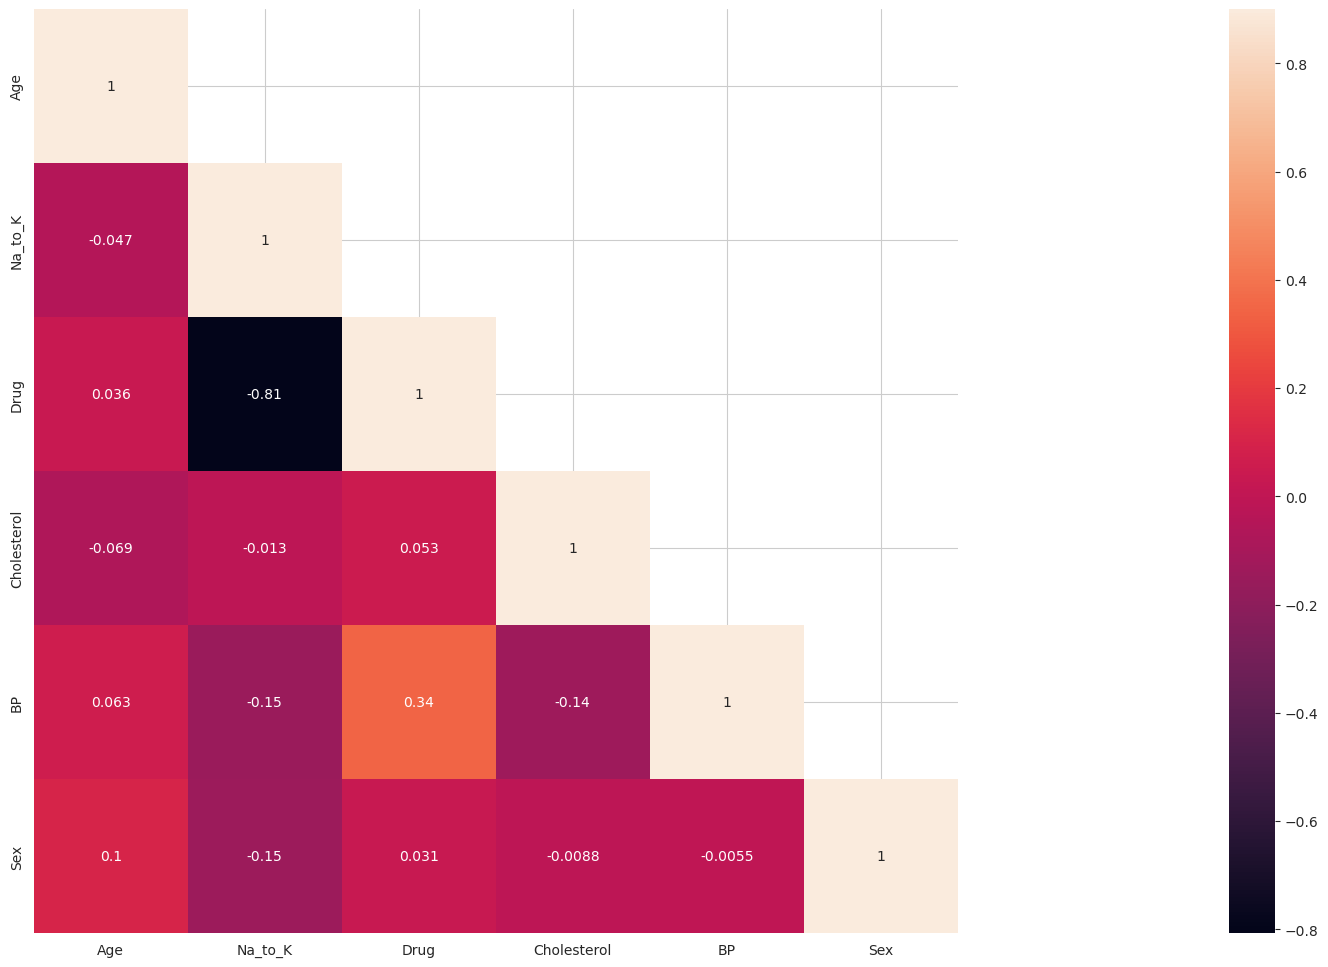

In [16]:
corr = dataframe_encoded.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(70,12)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

#  Modelling

In [17]:
x = dataframe_encoded.drop(columns = ['Drug'])
y = dataframe_encoded[['Drug']]


In [18]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 5)
(40, 5)
(160, 1)
(40, 1)


In [19]:

from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(random_state=0, n_estimators = 250, max_features = None, min_samples_split = 6)
etr.fit(x_train, y_train.values.ravel())
etr.score(x_train,y_train), etr.score(x_test,y_test)

(0.9945928848525477, 0.975220859868609)